<a href="https://colab.research.google.com/github/UpendraVishwanathYS/IISc_Deep_Learning_Course_Assignment/blob/main/M1_AST_04_Probability_Statistics_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Deep Learning
## A program by IISc and TalentSprint
### Assignment 4: Probability and Statistics

## Learning Objectives

At the end of the experiment, you will be able to

* get a broad exposure of the random variables and the way to deal them

* understand the concepts of discrete, continuous random variables

* understand CDF, PMF, PDF

* understand the concepts of probability distributions

* understand Expectation and Moments of random variables

* understand the terms like parameter estimation and bias estimator

* understand the bayesian inference with prior and posterior distributions

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M1_AST_04_Probability_Statistics_A" #name of the notebook

def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



### Importing required packages

In [1]:
import scipy                        # Scientific computation library
import numpy as np
import pandas as pd

import seaborn as sns               # Advaced Visualization with high level interface
import math
import matplotlib.pyplot as plt     # Visualization
import scipy.stats as stats

from math import factorial
from scipy import integrate         # Several integration techniques

# Importing various continuos and discrete probability distributions
from scipy.stats import binom, expon, uniform, bernoulli, poisson

sns.set_style('whitegrid')

Distribution is a function that provides the possible values of a variable and how often they occur. The probability distribution is a mathematical function that provides the possibilities of occurrence of the various possible outcomes that can occur in an experiment.

Probability distributions are either continuous probability distributions or discrete probability distributions, depending on whether they define probabilities for continuous or discrete random variables as shown in the figure below.

### Random Variables

Random variable is basically a function which maps from the set of sample space to set of real numbers. The purpose is to get an idea about result of a particular situation where we are given probabilities of different outcomes.

   Formal definition :   $ X: S -> R $

where,  $X$ = random variable, $S$ = set of sample space, $R$ = set of real numbers

To know more about random variables click [here](http://www.stat.yale.edu/Courses/1997-98/101/ranvar.htm).

There are mainly two types of random variables: discrete and continuous as shown in figure below

<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/Random_variables.jpg" width=550px/>
</center>



Constructing probability distributions for random variables

### Discrete Random Variable and PMF

A random variable $X$ is said to be discrete if it takes on finite number of values. The probability function associated with it is said to be probability mass function or PMF.
$P(x_i)$ = Probability that $(X = x_i)$ = PMF of $X = p_i$.

* $ 0 ≤ p_i ≤ 1 $
* $ ∑p_i = 1 $ where the sum is taken over all possible values of X

**Exercise 1:** Let $S$ is the sample space given below and corresponding $P(X=x_i)$ is also given, where $X$ is a discrete random variable. Find the probability at $X=0$.

In [2]:
# Creating the dataframe
df1 = pd.DataFrame({'X=0': '?', 'X=1':0.2, 'X=3': 0.3, 'X=4': 0.1}, index= ['P(X=xi)'])
print(df1)

        X=0  X=1  X=3  X=4
P(X=xi)   ?  0.2  0.3  0.1


In [6]:
# For a discrete random variable we know that sum of all P(X=xi) = 1,
# YOUR CODE HERE
sum_all_prob = 1
df1['X=0'] = sum_all_prob - sum(df1.iloc[0,1:])
print(df1)

         X=0  X=1  X=3  X=4
P(X=xi)  0.4  0.2  0.3  0.1


**Exercise 2:** Plot the PMF of the discrete random variable X defined as total number of heads while tossing a coin thrice.

In [7]:
# Our sample space would consist of {HHH, HHT,HTH, THH, TTH, THT, HTT, TTT}
X = [0, 1, 2, 3]   # Number of heads we can get are
sample_space = ['HHH', 'HHT', 'HTH', 'THH', 'TTH', 'THT', 'HTT', 'TTT']
# P(X=0)     {TTT}
# Sample space for 3 coin tosses
sample_space = ['HHH', 'HHT', 'HTH', 'THH', 'TTH', 'THT', 'HTT', 'TTT']

# Count the number of heads in each outcome
head_counts = [outcome.count('H') for outcome in sample_space]


In [9]:
# Our sample space would consist of {HHH, HHT,HTH, THH, TTH, THT, HTT, TTT}
X = [0, 1, 2, 3]   # Number of heads we can get are

sample_space = ['HHH', 'HHT', 'HTH', 'THH', 'TTH', 'THT', 'HTT', 'TTT']

# Count the number of heads in each outcome
head_counts = [outcome.count('H') for outcome in sample_space]


P_X0 = len([x for x in head_counts if x == 0])/len(sample_space)
P_X1 = len([x for x in head_counts if x == 1])/len(sample_space)
P_X2 = len([x for x in head_counts if x == 2])/len(sample_space)
P_X3 = len([x for x in head_counts if x == 3])/len(sample_space)

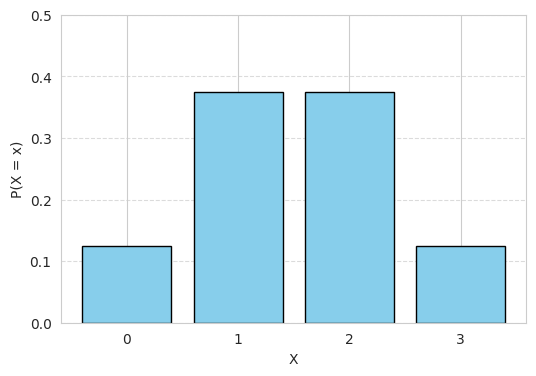

In [26]:
# Plotting PMF
# YOUR CODE HERE
pmf_values = [P_X0, P_X1, P_X2, P_X3]

# Plotting PMF
x_labels = ['0', '1', '2', '3']
plt.figure(figsize=(6,4))
plt.bar(x_labels, pmf_values, color='skyblue', edgecolor='black')
plt.xlabel('X')
plt.ylabel('P(X = x)')
plt.ylim(0, 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0, 0.5, 'P(X ≤ x)')

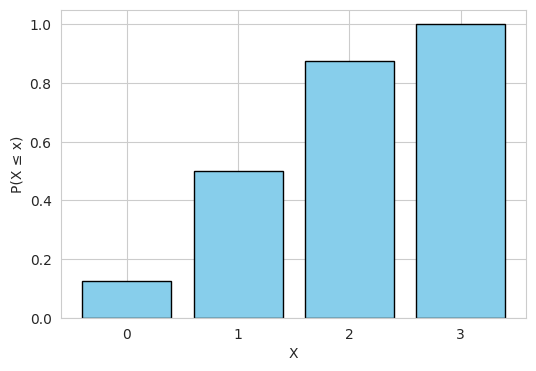

In [27]:
# Plotting CDF or cumulative distribution function
# YOUR CODE HERE
cdf_values = np.cumsum(pmf_values)
plt.figure(figsize=(6,4))
plt.bar(x_labels, cdf_values, color='skyblue', edgecolor='black')
plt.xlabel('X')
plt.ylabel('P(X ≤ x)')

For further reference [click here](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)

From above plot it can be seen that $ ∑p_i = 1 $.

### Continuous Random Variable and PDF

A random variable $X$ is said to be continuous if it takes on the infinite number of values. The probability function associated with it is said to be PDF or probability density function.

PDF: If $X$ is a continuous random variable.

$ P (x < X < x + dx) = f(x).dx $

* $ f(x) ≥ 0; $ for all $x$
* $ ∫ f(x) dx = 1  $ over all values of $x$

Then $P (X)$ is said to be a PDF of the distribution.

The probability distribution of a continuous random variable $X$ is an assignment of probabilities to intervals of decimal numbers using a function $f(x)$, called a density function, in the following way: the probability that $X$ assumes a value in the interval $(a,b)$ is equal to the area of the region that is bounded above by the graph of the equation $y=f(x)$, bounded below by the $x$-axis, and bounded on the left and right by the vertical lines through $a$ and $b$, as shown in the figure below
![image](https://cdn.iisc.talentsprint.com/CDS/Images/prob_density_function.png)

**Exercise 3:** Compute the value of $P (1 < X < 2)$.
    Such that the density function is given by,

$$f(x)=\begin{equation}
\left\{
  \begin{aligned}
    &k.x^3&  for\ \  0 ≤ x ≤ 3\\
    &0&   \  otherwise\\
  \end{aligned}
  \right.
\end{equation}
$$

Also, plot the PDF and CDF for random variable $X$.

In [38]:
# ∫ f(x) dx = 1
# Using the above property we find k,
# ∫ (k*x**3)dx = 1
# k = 1 / ∫ (x**3)dx
# integrate  x^3  w.r.t  x from 0 to 3

k = 1 / integrate.quad(lambda x: x**3, 0, 3)[0]

print('k=', round(k,4))

k= 0.0494


In [39]:
# Now the probability density for 1<X<2 is given by,
P = integrate.quad(lambda x: k*x**3, 1, 2)[0]
print('P =', round(P,4))

P = 0.1852


In [44]:
# Create 100 values within 0 to 3 in order to plot PDF and CDF
# YOUR CODE HERE
x = np.linspace(0, 3, 100)

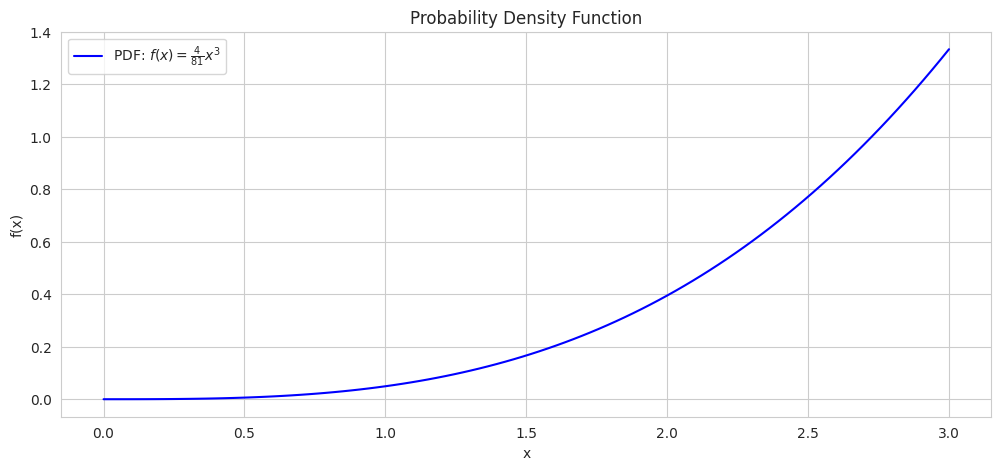

In [45]:
# Plotting PDF
# YOUR CODE HERE
pdf = k * x**3
plt.figure(figsize=(12, 5))
plt.plot(x, k * x**3, label='PDF: $f(x) = \\frac{4}{81}x^3$', color='blue')
plt.title('Probability Density Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

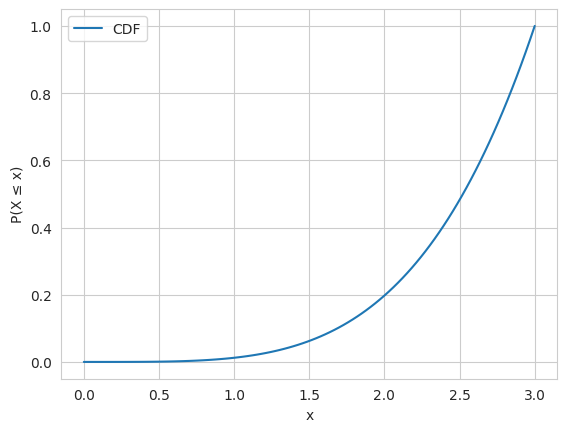

In [46]:
# Plotting CDF
# YOUR CODE HERE
cdf = [integrate.quad(lambda t: k * t**3, 0, xi)[0] for xi in x]
plt.plot(x, cdf, label='CDF')
plt.xlabel('x')
plt.ylabel('P(X ≤ x)')
plt.legend()
plt.show()

From above plot it can be seen that $ ∫f(x) dx = 1  $.

### Constructing probability distributions for random variables and Expected value

**Constructing probability distributions for random variables:-**The probability distribution of a discrete random variable  $X$  is a list of each possible value of $X$  together with the probability that  $X$  takes that value in one trial of the experiment.

The probabilities in the probability distribution of a random variable  X  must satisfy the following two conditions:

Each probability  $P(x)$  must be between  0  and  1 :

* $ 0 ≤ P_i ≤ 1 $

The sum of all the possible probabilities is  1 :
* $ ∑P_i = 1 $




**Expected value of a random variable:-** Let  X  be a numerically-valued discrete random variable with sample space  Ω  and distribution function  m(x) . The expected value  E(X)  is defined by provided this sum converges absolutely. It is represented as:


$E(X)=\sum_{x∈Ω}x.m(x)$



**Exercise 4:** The random variable $X$ has a probability function:
\begin{equation}
             \nonumber P(X=x) = \left\{
              \begin{array}{l l}
                k(x+4) & \quad,  x= 0,1,2\\
                k*x & \quad  , x=3,4,5
              \end{array} \right.
            \end{equation}
Find the value of k, construct the probability distribution table and the expected value

In [47]:
# K(X+4) for x = 0,1,2
lis = []
# YOUR CODE HERE
k = 1/27
for x in[0,1,2,3,4,5]:
  if x<3:
    lis.append(k*(x+4))
  else:
    lis.append(k*x)
print(lis)

[0.14814814814814814, 0.18518518518518517, 0.2222222222222222, 0.1111111111111111, 0.14814814814814814, 0.18518518518518517]


In [50]:
data = {'values': [0, 1, 2, 3, 4, 5],
        'probabilities': lis
        }
df = pd.DataFrame(data)
print(df)

   values  probabilities
0       0       0.148148
1       1       0.185185
2       2       0.222222
3       3       0.111111
4       4       0.148148
5       5       0.185185


In [51]:
df["probability_distribution"] = df["values"] * k
print (df["values"])
print(df["probability_distribution"].sum())

0    0
1    1
2    2
3    3
4    4
5    5
Name: values, dtype: int64
0.5555555555555556


In [52]:
# Creating a new column with the product of the columns of values and probability
# YOUR CODE HERE
df['expected_value'] = df['values'] * df['probability_distribution']

# Expected value
# YOUR CODE HERE
expected_value = df['expected_value'].sum()
print(expected_value)

2.037037037037037


### Expected value of a random variable

**Expected value of a random variable:-** Let  X  be a numerically-valued discrete random variable with sample space  Ω  and distribution function  m(x) . The expected value  E(X)  is defined by provided this sum converges absolutely. It is represented as:

$E(X)=\sum_{x∈Ω}x.m(x)$,



**Exercise 5:** Let $S$ is the sample space given below and corresponding $P(X=x_i)$ is also given, where $X$ is a discrete random variable. Find the Expected value.

In [54]:
data = {
  "values": [0, 1, 2, 3, 4, 5],
  "probability_outcomes": [0.15, 0.2, 0.15, 0.25, 0.15, 0.1]
}

df = pd.DataFrame(data) # load data into a DataFrame object

df['expected_value'] = df['values'] * df['probability_outcomes'] # Creating a new column with the product of the columns of values and probability
# expected value
# YOUR CODE HERE
expected_value = df['expected_value'].sum()
print(expected_value)

2.35


### Probability Distributions

**Probability distribution**:- It is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range.
There are many types of Probability distribution,such as:-

*   Uniform Distribution
*   Bernoulli Distribution
*   Binomial Distribution
*   Poisson Distribution
*   Exponential Distribution



### Uniform Distribution

**Uniform Distribution**:- The probability distribution function of the continuous uniform distribution is:
$$f(x)=\begin{equation}
\left\{
  \begin{aligned}
    &\frac{1}{b-a}&  for\  a≤x≤b\\
    &0&   for\  x<a\ or\ x>b\\
  \end{aligned}
  \right.
\end{equation}
$$

Since any interval of numbers of equal width has an equal probability of being observed, the curve describing the distribution is a rectangle, with constant height across the interval and 0 height elsewhere. Since the area under the curve must be equal to 1, the length of the interval determines the height of the curve. For a uniform distribution in the interval (a,b), the area needs to be 1 so the height is set to 1/(b−a).


To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

**Exercise 6:** Plot the uniform distribution of size 10000 over the range {10,30}.

In [55]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = stats.uniform.rvs(size=n, loc = start, scale=width)

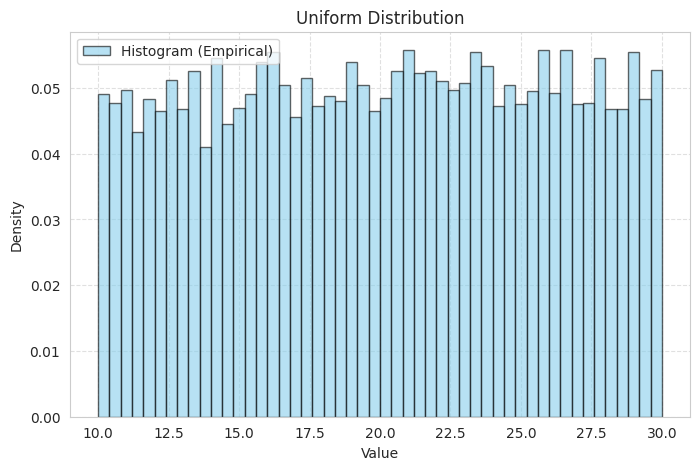

In [66]:
# Ploting the graph
# YOUR CODE HERE
plt.figure(figsize=(8,5))
plt.hist(data_uniform, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram (Empirical)')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Bernoulli Distribution

**Bernoulli Distribution**:- A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial, for example, a coin toss. So the random variable *X*, which has a Bernoulli distribution, can take value 1 with the probability of success, *p*, and the value 0 with the probability of failure, *q* or *1−p*. The probabilities of success and failure need not be equally likely. The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted (*n*=1). Its probability mass function is given by:

### $f(k,p) = p^{k} (1-p)^{1-k}$

for $k$ in {0,1}, also $ 0≤p≤1$.


To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html)


**Exercise 3:** Consider a random experiment of tossing a biased coin (having the probability of getting a head as 0.6) once. Plot the distribution associated with the event of getting heads in the given experiment if the process is repeated 10000 times.

In [59]:
# Generate data
p=0.6                      # probability of getting a head
q=1-p                      # probability of getting a tail

# Creating a data of size 10000 for bernouli distribution
data_bern = stats.bernoulli.rvs(p, size=10000)

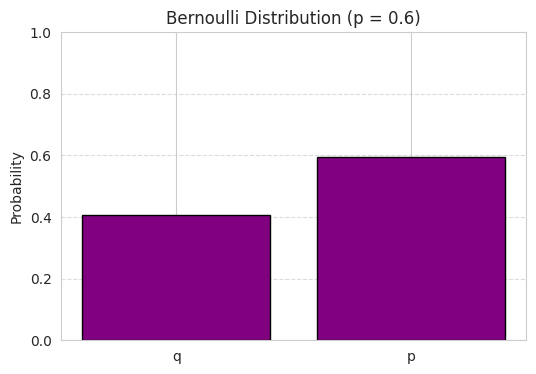

In [69]:
# visualize data
# YOUR CODE HERE
counts = np.bincount(data_bern)
labels = ['q', 'p']
probabilities = counts / len(data_bern)

plt.figure(figsize=(6,4))
plt.bar(labels, probabilities, color='purple', edgecolor='black')
plt.title('Bernoulli Distribution (p = 0.6)')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 0.6                      # Probability of head (success)
q = 1 - p                    # Probability of tail (failure)

# Step 1: Generate 10,000 samples from Bernoulli distribution
data_bern = np.random.binomial(n=1, p=p, size=10000)

### Binomial Distribution

**Binomial Distribution**:- A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is the same for all the trials is called a binomial distribution. However, the outcomes need not be equally likely, and each trial is independent of the other. The most common example is that of flipping a coin n number of times and calculating the probabilities of getting a particular number of heads. More real-world examples include the number of successful sales calls for a company or whether a drug works for a disease or not.

The parameters of a binomial distribution are *n* and *p* where *n* is the total number of trials, and *p* is the probability of success in each trial. Its probability distribution function is given by :

### $f(k,n,p) = P(X=k) = \begin{pmatrix}
n \\
k
\end{pmatrix} p^k(1-p)^{n-k}$


where :
$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

where, *k* is the number of times the success is achieved and lies in {0, 1,..., n}, also $ 0≤p≤1$.


To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)


**Exercise 2:** Consider an event where a fair coin is tossed 10 times and the total number of heads is recorded. Plot the distribution for the event.

In [72]:
# Generate data
p = 1/2             # probability of getting a head
q = 1-p             # probability of getting a tail
n = 10              # total number of trials
data_binom = stats.binom.rvs(n, p, size=10000)

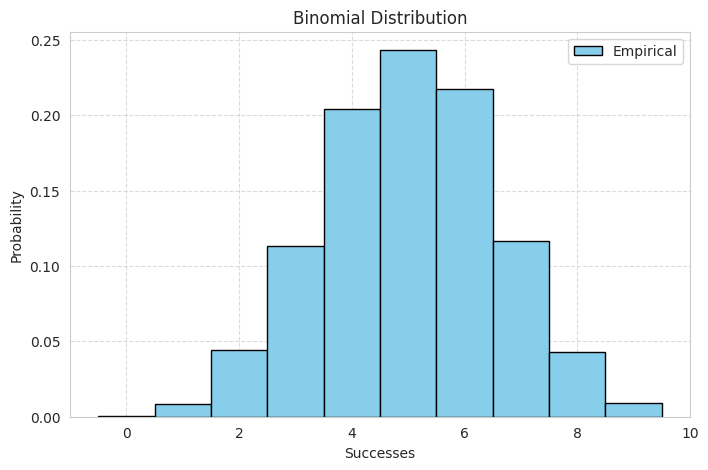

In [76]:
# Visualize data
# YOUR CODE HERE
# Plot histogram of empirical data
plt.figure(figsize=(8,5))
plt.hist(data_binom, bins=n, align='left', density=True, color='skyblue',
         edgecolor='black', label='Empirical')

plt.title(f'Binomial Distribution')
plt.xlabel('Successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Practical example explaining use case of binomial distribution


 There are 10 sets of traffic lights on the journey.The probability that a driver must stop at any one traffic light coming to airport is 0.25

(a) What is the probability that a driver must stop at exactly 2 of the 10 sets of traffic lights?

(b) What is the probability that a driver will be stopped at 1 or more of the 10 sets of traffic lights?

**(a) What is the probability that a driver must stop at exactly 2 of the 10 sets of traffic lights?**

Here we have to calculate the probablity that particular event happens exactly two times

$$ P(X = 2) = {\binom{10}{2}\cdot(0.25)^2\cdot(1-0.25)^8}.$$

In [78]:
n = 10   # Number of times experiment runs
p = 0.25 # Probability of outcome(here driver stopping at traffic light)
k = 2    # Number of successful trails(given n trails)

pmf_binomial = stats.binom.pmf(k, n, p) # Probability mass function

# Probability mass function for k = 2 i.e. P(X=2)
# YOUR CODE HERE
print(pmf_binomial)

0.28156757354736334


To understand more about ***stats.binom.pmf()*** method and its usage [click here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)

**(b) What is the probability that a driver will be stopped at 1 or more of the 10 sets of traffic lights?**

Here we have to calculate the probablity that particular event happens one or more times i.e. $ P(X≥1) $ or $ [1- P(X=0)] $

$$ P(X ≥ 1) = 1 - [{\binom{10}{0}\cdot(0.25)^0\cdot(1-0.25)^{10} }].$$

In [84]:
n = 10   # Number of times experiment runs
p = 0.25 # Probability of outcome(here driver stopping at traffic light)
k = 0    # Number of successful trails(given n trails)

cumbinomial = stats.binom.pmf(k, n, p)
# YOUR CODE HERE
print(1-cumbinomial)

0.9436864852905273


To understand more about ***stats.binom.cdf()*** method and its usage [click here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)

### Poisson Distribution

**Poisson Distribution**:- Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of as a Poisson process. Poisson distribution is described in terms of the rate at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated as *λ*. Lambda(λ) is the event rate, also called the rate parameter. The probability of observing *k* events in an interval is given by the equation:

$$ P(k\ events\ in\ the\ interval) = \frac{e^{-λ}λ^k}{k!} $$

To understand more click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

**Exercise 5:** Plot the poisson distribution having size 10000 and given rate(mean) parameter as 4.

In [85]:
# Generate data
rate = 4
data_poisson = stats.poisson.rvs(mu=rate, size=10000)

(array([0.06853846, 0.11715385, 0.15338462, 0.26715385, 0.07876923,
        0.04638462, 0.03069231, 0.004     , 0.00192308, 0.00123077]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

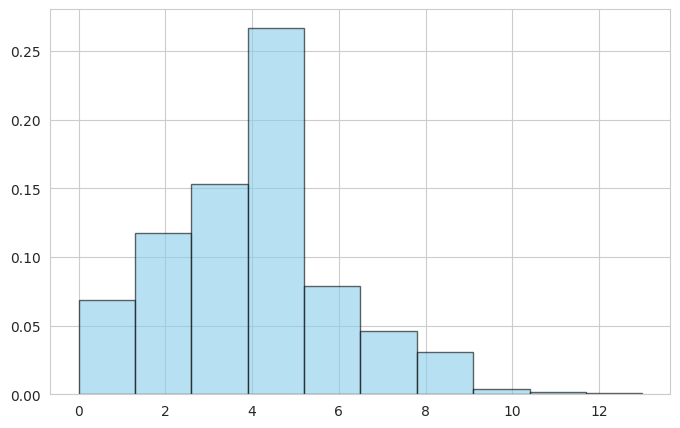

In [86]:
# visualize data
# YOUR CODE HERE
plt.figure(figsize=(8,5))
plt.hist(data_poisson, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram (Empirical)')

#### Practical example for Poisson distribution

The number of work related injuries per month in a manufacturing plant is known to follow a Poisson distribution, with a mean of 2.5 work-related injuries a month.

a) What is the probability that in a given month, no work-related injuries occur?

b) That at least two work- related injury occurs?

**(a) What is the probability that in a given month, no work-related injuries occur?**

Here we have to calculate the probablity that given month has,no work related injuries using probability mass function

$$ P(X = 0) = \frac{(e^{-2.5} * 2.5^{0})} {0!}
 $$
 $$ P(X = 0) = 0.08208 $$

In [87]:
# Calculate probability using pmf
# YOUR CODE HERE
xi = 0
pmf_poisson = stats.poisson.pmf(xi, 2.5)
print(pmf_poisson)

0.0820849986238988


To understand more about ***stats.poisson.pmf()*** method and its usage [click here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html?highlight=stats%20poisson%20cdf)

**b) That at least two work- related injury occurs?**

Here we have to calculate the probablity that given month has,two or more related injuries

$$ P(X >=2 ) = 1 - [P(X <2 ) $$
$$ P(X >=2 ) = 1 - [P(X = 0) +P(X=1)] $$
$$ P(X >=2 ) = 1 - [\frac{(e^{-2.5} * 2.5^{0})} {0!}  +   \frac{(e^{-2.5} * 2.5^{1})} {1!}]
 $$
 $$ P(X >=2 ) = 0.7127025048163542 $$

In [88]:
# Calculating probability using CDF
cumulative_binomial = 1 - sum([stats.poisson.pmf(xi, 2.5) for xi in range(0,2)])
# YOUR CODE HERE # P(X>=2) or 1-P(X=0)-P(X=1)
# YOUR CODE HERE
print(cumulative_binomial)

0.7127025048163542


To understand more about ***stats.poisson.cdf()*** method and its usage [click here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html?highlight=stats%20poisson%20cdf)

### Exponential Distribution

**Exponential Distribution:-**A continuous random variable $X$ is said to have an exponential distribution with parameter $λ>0$, shown as $X∼Exponential(λ)$, if its PDF is given by \begin{equation}
             \nonumber f_X(x;\mu) = \left\{
              \begin{array}{l l}
                \lambda e^{-\lambda x} & \quad  x > 0\\
                0 & \quad \textrm{otherwise}
              \end{array} \right.
            \end{equation}
To understand more, click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).

**Exercise 4:-** Generate Exponential random data and plot it.

In [89]:
# Generate random normalised data
data_expon = stats.expon.rvs(scale=1, size=10000)

(array([5.85217598e-01, 1.97865517e-01, 6.03982965e-02, 2.04237014e-02,
        5.93509272e-03, 1.65833473e-03, 7.85526977e-04, 3.49123101e-04,
        8.72807752e-05, 8.72807752e-05]),
 array([5.42766344e-05, 1.14578196e+00, 2.29150963e+00, 3.43723731e+00,
        4.58296499e+00, 5.72869267e+00, 6.87442035e+00, 8.02014803e+00,
        9.16587571e+00, 1.03116034e+01, 1.14573311e+01]),
 <BarContainer object of 10 artists>)

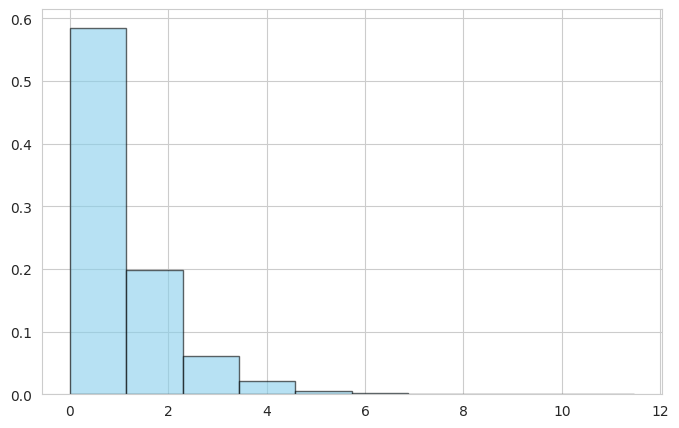

In [90]:
# YOUR CODE HERE
plt.figure(figsize=(8,5))
plt.hist(data_expon, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram (Empirical)')

### Measures of Central Tendency and Variability

There are three main measures of central tendency: the mode, the median and the mean. Each of these measures describes a different indication of the typical or central value in the distribution.


**Mean**

The mean is the sum of the value of each observation in a dataset divided by the number of observations. This is also known as the arithmetic average.

**Advantage of the mean** : The mean can be used for both continuous and discrete numeric data.

**Limitations of the mean** : The mean cannot be calculated for categorical data, as the values cannot be summed.

As the mean includes every value in the distribution the mean is influenced by outliers and skewed distributions.


**Median**

The median is the middle value in distribution when the values are arranged in ascending or descending order.

The median divides the distribution in half (there are 50% of observations on either side of the median value). In a distribution with an odd number of observations, the median value is the middle value.

**Advantage of the median**: The median is less affected by outliers and skewed data than the mean, and is usually the preferred measure of central tendency when the distribution is not symmetrical.

**Limitation of the median**: The median cannot be identified for categorical nominal data, as it cannot be logically ordered.


**Mode**

The mode is the most commonly occurring value in a distribution.

**Advantage of the mode**: The mode has an advantage over the median and the mean as it can be found for both numerical and categorical (non-numerical) data.

**Limitations of the mode**: The are some limitations to using the mode. In some distributions, the mode may not reflect the centre of the distribution very well.


 **1.** The retirement age of eleven people are 54, 54, 54, 55, 56, 57, 57, 58, 58, 60, and 60. Find the mean, median and mode for the retirement age.

In [92]:
retirement_age = [54, 54, 54, 55, 56, 57, 57, 58, 58, 60, 60]

The mean is calculated by adding together all the values **(54+54+54+55+56+57+57+58+58+60+60 = 623)** and dividing by the number of observations (11. But here we will directly use mean() method of numpy library.

In [93]:
# YOUR CODE HERE
mean = np.mean(retirement_age)
print(mean)

56.63636363636363


In [94]:
# YOUR CODE HERE
median = np.median(retirement_age)
print(median)

57.0


For the above data, the median is the middle value, which is 57 years.

But, when the distribution has an even number of observations, the median value is the mean of the two middle values. Consider the following distribution, the two middle values are 56 and 57, therefore the median equals 56.5 years:

52, 54, 54, 54, 55, 56, 57, 57, 58, 58, 60, 60

In [95]:
# Use the mode() function from the statistics module
# YOUR CODE HERE
from scipy import stats
mode = stats.mode(retirement_age)
print(mode)

ModeResult(mode=np.int64(54), count=np.int64(3))


The above `stats.mode()` method returns

`mode:` Array of modal values.

`count:` Array of counts for each mode.


The most commonly occurring value is 54, therefore the mode of this distribution is 54 years.

When the distribution of retirement age is ordered from lowest to highest value, it is easy to see that the centre of the distribution is 57 years, but the mode is lower, at 54 years.

54, 54, 54, 55, 56, 57, 57, 58, 58, 60, 60

It is also possible for there to be more than one mode for the same distribution of data, (bi-modal, or multi-modal). The presence of more than one mode can limit the ability of the mode in describing the centre or typical value of the distribution because a single value to describe the centre cannot be identified.

In some cases, particularly where the data are continuous, the distribution may have no mode at all (i.e. if all values are different).

In cases such as these, it may be better to consider using the median or mean, or group the data in to appropriate intervals, and find the modal class.


**How do outliers influence the measures of central tendency?**

**Outliers are extreme, or atypical data value(s) that are notably different from the rest of the data.**

It is important to detect outliers within a distribution, because they can alter the results of the data analysis. The mean is more sensitive to the existence of outliers than the median or mode.

Consider the initial retirement age dataset again, with one difference; the last observation of 60 years has been replaced with a retirement age of 81 years. This value is much higher than the other values, and could be considered an outlier. However, it has not changed the middle of the distribution, and therefore the median value is still 57 years.

54, 54, 54, 55, 56, 57, 57, 58, 58, 60, 81

As the all values are included in the calculation of the mean, the outlier will influence the mean value.

(54+54+54+55+56+57+57+58+58+60+81 = 644), divided by 11 = 58.5 years

In this distribution the outlier value has increased the mean value.

Despite the existence of outliers in a distribution, the mean can still be an appropriate measure of central tendency, especially if the rest of the data is normally distributed. If the outlier is confirmed as a valid extreme value, it should not be removed from the dataset. Several common regression techniques can help reduce the influence of outliers on the mean value.

### Expectation and Moments of Random Variables

**Expectation:** The expected value of a random variable $X$, which is denoted $E(X)$, is a generalization of the weighted average. The expectation or expected value of a random variable is a single number and it tells us a lot about the behavior of the variable. In simple terms, the expectation is the average value of the random variable where each value is weighted according to its probability.

For a discrete random variable that can take $n$ outcomes like $x_1, x_2, x_3, ..., x_n$ with probabilities $p_1, p_2, p_3,..., p_n$, the expectation is given by,

$E(X) = \Sigma_{i=1}^{n}p_i.x_i$

For a continuous random variable we use integration in place of summation. The formula to remember is,

$ E(X) = \int_{x_{min}}^{x_{max}} x.f(x) \,dx $

Here $f(x)$ is the probability density function.

Let us now check a simple python code for finding the expectation of a given discrete random variable. The random variable can take values of $\{1, 4, 3\}$ and have probabilities $\{0.1, 0.5, 0.4\}$.


In [96]:
# A simple function to calculate expectation in python. The function works for discrete random variables only.

def expectation(outcomes, probs):
    # YOUR CODE HERE
    e = np.sum(np.array(outcomes) * np.array(probs))
    return e

# Let us define x and p's.
x = [1, 4, 3]
p = [0.1, 0.5, 0.4]

print ("Expectation of the given random experiment is: ", expectation(x, p))

Expectation of the given random experiment is:  3.3000000000000003


**Moment:** In general, moment of a function are quantitative measures that depicts the shape of the function's graph. In a probability distribution, the first moment is the expectation (described above), the second central moment is the variance, the third standardized moment is the skewness, and the fourth standardized moment is the kurtosis, etc. The general formula for a $k^{th}$ moment in ``scipy`` is,

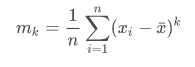

Here $n$ are the number of discrete examples and $\overline{x}$ is the mean of the examples.

To summarize moments,
* 1st moment: expectation
* 2nd moment: variance
* 3rd moment: Skew

We will conduct an experiment based on this information. First, we will sample 10,000 points from a normal distribution of know $\mu$ and $\sigma$. We will then use the function to calculate moments. Ideally, the 1st and 2nd moments should match those of $\mu$ and $\sigma$ respectively.

In [97]:
# Declaring mu and sigma according to our choice
mu = 10
standard_dev = 5

# 10000 points are sampled from the normal distribution with given mu and sigma.
data_normal = stats.norm.rvs(loc=mu, scale=standard_dev, size=10000)

# YOUR CODE HERE:
est_mu = np.mean(data_normal)
print("The 1st moment is ", est_mu)
est_sigma = np.std(data_normal)
print("The 2nd moment is ", est_sigma)

The 1st moment is  9.994135422096257
The 2nd moment is  5.032577333186193


### Parameter Estimation

**Parameter Estimation:** Parameters are defined as the characteristics of the given data. Estimators are defined as the predictions of values with the help of the dataset.

Any function of a random sample that is used to estimate the values of the parameter of a given dataset is called Parameter Estimation.

If $x_1,x_2,x_3,....x_n$ is the sample size of size n, then

$T_n(x_1,x_2,x_3,....x_n)$ will be the estimator of parameter.

### Bias Estimation

**Bias Estimation:**  Bias is a term that refers to any type of error or distortion that is found with the use of analysis. Bias Estimation is the difference between the parameter to be estimated and the mathematical expectation of the estimator.

$bias(\hatθ_n)$ = $E[\hatθ_n]- \hatθ_n$

The estimator is said to be unbiased when expected parameter and the original parameter are same i.e $E[θ_n^|] = θ_n^|.$

`1.` `Calculate the bias for the below given dataframe.`


  `dataframe = {`

  `'Expected_parameter':[2,3,1,5,6,7,8,9,6,5,4,3,2],`

  `'Original_parameter':[3,4,3,2,2,4,5,6,9,6,6,4,5]`
`}`




In [98]:
data = {
    'Expected_parameter':[2,3,1,5,6,7,8,9,6,5,4,3,2],
    'Original_parameter':[3,4,3,2,2,4,5,6,9,6,6,4,5]
}

In [100]:
dataframe = pd.DataFrame(data)
dataframe['Bias'] = dataframe['Expected_parameter'] - dataframe['Original_parameter']
print("The bias is\n", dataframe["Bias"])

The bias is
 0    -1
1    -1
2    -2
3     3
4     4
5     3
6     3
7     3
8    -3
9    -1
10   -2
11   -1
12   -3
Name: Bias, dtype: int64


### Bayesian inference

**Bayesian inference :**- Bayesian inference is a method of statistical inference in which Baye's theorem is used to update the probability for a hypothesis as more evidence or information becomes available. Bayesian inference is an important technique in statistics, and especially in mathematical statistics.

The core of Bayesian Inference is to combine two different distributions (likelihood and prior) into one “smarter” distribution (posterior). Posterior is **“smarter” in the sense that the classic maximum likelihood estimation (MLE) doesn’t take into account a prior**. Once we calculate the posterior, we use it to find the “best” parameters and the **“best” is in terms of maximizing the posterior probability**, given the data. This process is called Maximum A Posteriori (MAP).

Bayesian Inference has three steps.

Step 1. **[Prior] Choose a PDF to model your parameter θ**, aka the prior distribution **P(θ)**. This is **your best guess** about parameters **before** seeing the data **X**.

Step 2. **[Likelihood] Choose a PDF for $P(X|θ)$**. Basically you are modeling how the data **$X$** will look like given the parameter **$θ$**.

Step 3. **[Posterior] Calculate the posterior** distribution **$P(θ|X)$** and pick the **$θ$ that has the highest $P(θ|X)$**.

And the posterior becomes the new prior. Repeat step 3 as you get more data.


**Formula for calculating Posterior**

$P(θ|X) = \frac{P(X|θ).P(θ)}{\int P(X|θ).P(θ).dθ}$

where, $P(θ|X)$ = Posterior, $P(X|θ)$ = Sampling, $P(θ)$ = Prior, $dθ$ = Normalizing constant

**Note**: We will follow these steps to work on 11th question.

2. Bob is selecting one marble from two bowls of marbles. The first bowl has 75 red marbles and 25 blue marbles. The second bowl has 50 red marbles and 50 blue marbles. Given that Bob is equally likely to choose from either bowl and does not discriminate between the marbles themselves, Bob in fact chooses a red marble. What is the probability Bob picked the marble from bowl 1 and bowl 2?

In [102]:
# Probability of fetching the marble from bowl
P_H_1 = P_H_2 = 0.5

# Probability of fetching the red marble from first bowl
P_E_H_1 = 75/100

# Probability of fetching the marble from second bowl
P_E_H_2 = 50/100

# Applying the Bayesian formula to pick the red marble from first bowl
P_H_1_E = (P_E_H_1 * P_H_1) / (P_E_H_1 * P_H_1 + P_E_H_2 * P_H_2)
P_H_2_E = 1 - P_H_1_E
print("The probability of fetching the red marble from bowl 1 is "+str(P_H_1_E)+ " and from bowl 2 is "+str(P_H_2_E))

The probability of fetching the red marble from bowl 1 is 0.6 and from bowl 2 is 0.4


### Prior and Posterior distribution

**Prior distribution:**
A Prior distribution represents your belief about the true or false value of a parameter. It shows your “best guess.”

**Posterior distribution:**  The posterior distribution summarizes what you know after the data has been observed. The summary of the evidence from the new observations is the likelihood function.
It is represented as $Posterior$ $Distribution$ $=$ $Prior$ $Distribution * Likelihood$ $Function (“new$ $evidence”)$

3. Consider a scenario, where, an education management company conducts free sessions on YouTube on various topics related to Deep Learning. Everytime a session is conducted, around 4000 people actively attends it. After the experts closes the session, a feedback is asked from the attendees. Some people liked the session and some don't. Now, we would like to make predictions about what percentage of people will engage and like when we conduct a session in the future, so that the company can understand about the potential participants willing to continue learning by enrolling in their professional courses.



Let's generate the data X.

In [104]:
np.set_printoptions(threshold=100)

# Generating 4,000 participants reponse.
# Assuming the 'likes' or 'dislikes' follow a Bernoulli process - a sequence of binary (success/failure) random variables.
# 1 means liked. 0 means dislike.

# We pick the success rate of 30%.
liked_prob = 0.3

# IID (independent and identically distributed) assumption
liked_data = stats.bernoulli.rvs(p=liked_prob, size=4000)

Let us have a look at liked data.

In [105]:
print(liked_data)

[1 0 0 ... 1 1 0]


In [106]:
len(liked_data)

4000

Firstly, we will choose the PDF to model the parameter $\theta$.

Note : $\theta$ is the **'liking'** probability.


`i) What kind of probability distributions should we use to model a probability?`

**Explaination**: Since, we have only one thing to predict, we will use a Beta distribution. It has two parameters, $α$ & $β$, that we need to decide. You can think of $α$ as How many people liked (the number of successes) and $β$ as how many people did’t liked (the number of failures). These parameters — how big or small $α$ & $β$ are — will determine the shape of the distribution.

`ii) Let us assume that we have 800 people out of 4000 who liked the session. Write this in terms of beta distribution and plot the prior distribution with respect to all` $\theta$ `values`.

In [135]:
# Declaring alpha and beta
alpha = 800
beta = 4000 - alpha

# domain θ
theta_range = np.linspace(0, 1, 2000)

# prior distribution P(θ)
prior = stats.beta.pdf(x = theta_range, a=alpha, b=beta)

Plotting the distribution

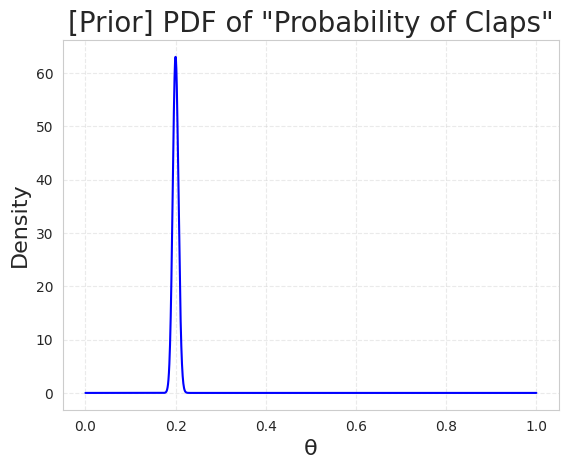

In [136]:
# Plotting the prior distribution
# YOUR CODE HERE
plt.plot(theta_range, prior, color='blue')
# Add a title
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)

# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

We can observe from the above plot that it spikes at 20% (800 likes / 4000 participants) as expected.

Further, lets get into step 2 which is Likelihood $P(X|θ)$.

Choose a probability model for $P(X|θ)$, the probability of seeing the data $X$ given a particular parameter $θ$. We can also call Likelihood as a sampling distribution.

`iii) Find out which probability distribution should be used to model the sampling distribution and the likelihood?`






```
# This is formatted as code
```

**Hint:** Since $X$ is binary, and we also have the total number of participants $(n)$ and we want the probability of liked $(p)$. So, we can use Binomial Distribution with $n$ and $p$.

In [133]:
# Calculate the total number of likes in the data
num_likes = np.sum(liked_data)

# The sampling dist P(X|θ) with a prior θ
# Calculate the likelihood of observing 'num_likes' successes in 4000 trials for each value in theta_range

likelihood = stats.binom.pmf(k=num_likes, n=4000, p=theta_range)
print(likelihood)

[0. 0. 0. ... 0. 0. 0.]


`iv)` `Plot the graph for` $P(X|θ)$ `for all possible` $θ$.












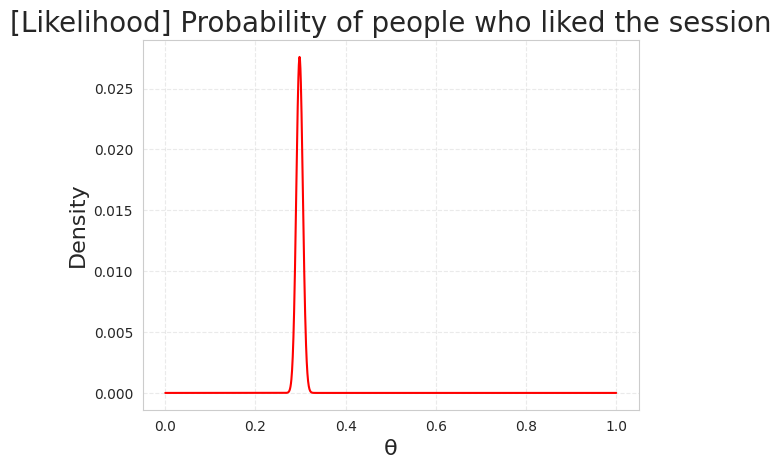

In [137]:
# Likelihood P(X|θ) for all θ's
likelihood = likelihood / np.sum(likelihood)

# Create the plot
# YOUR CODE HERE
plt.plot(theta_range, likelihood, color='red')

# Add a title
plt.title('[Likelihood] Probability of people who liked the session' , fontsize=20)

# Add X and y Label
# YOUR CODE HERE
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)

# Add a grid
plt.grid(alpha=.4, linestyle='--')

# Show the plot
plt.show()

Now, we will try to calculate the posterior distribution.

Even though there are thousands of data points, we can convert them into a single scalar — the likelihood **$P(X|θ)$ — by plugging data into the model that you choose** (in this example, the binomial distribution).

Then, we calculate **$P(θ)$ & $P(X|θ)$** for a specific **$θ$** and multiply them together. If you do this for every possible **$θ$**, you can pick the highest **$P(θ)$ * $P(X|θ)$** among different **$θ’s$**.

Your initial guess about parameters was **$P(θ)$**. Now you are **upgrading a simple $P(θ)$ into something more informative — $P(θ|X)$ — as more data become available.**
**$P(θ|X)$** is still the probability of **$θ$**, just like **$P(θ)$** is. However, **$P(θ|X)$** is a smarter version of **$P(θ)$**.

`v). Calculate the Posterior Distribution` $P(θ|X)$?

In [138]:
# Finding the Prior
theta_range_e = theta_range + 0.001
prior = stats.beta.pdf(x = theta_range_e, a=alpha, b=beta)
prior = prior / np.sum(prior)
# prior = stats.beta.pdf(x = theta_range, a=alpha, b=beta)

# Finding likelihood
likelihood = stats.binom.pmf(k=num_likes, n=2000, p=theta_range)

# Element-wise multiplication
posterior = likelihood * prior
normalized_posterior = posterior / np.sum(posterior)

**Note:** We calculated the prior by subtracting two `stats.beta.cdf` instead of using `stats.beta.pdf` because the likelihood `stats.binom.pmf` is a probability while `stats.beta.pdf` returns a density. Even if we use the density to calculate the posterior, it won’t change the optimization result. However, if you want the units to match, converting a density into a probability is necessary.

`vi). Plot the graph for Prior, Likelihood, and Posterior together.`

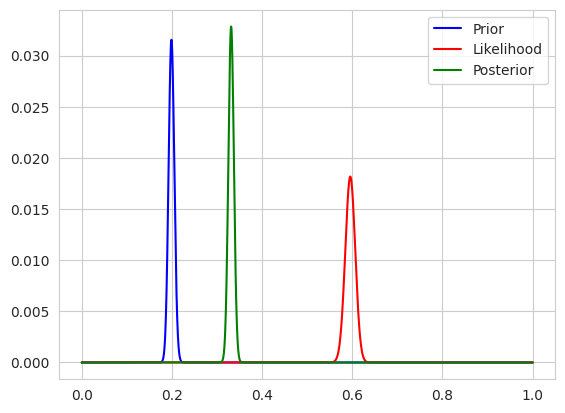

In [139]:
# Plotting all three together
# YOUR CODE HERE
plt.plot(theta_range, prior, color='blue', label='Prior')
plt.plot(theta_range, likelihood, color='red', label='Likelihood')
plt.plot(theta_range, normalized_posterior, color='green', label='Posterior')
plt.legend()

When you look at the posterior graph (the 3rd one), **notice it is where the likelihood shifted toward the prior**. The **liked** probability for the prior was 20%. The **liked** probability for the data was given as 30%. Now, the posterior has its peak around 0.25%.

Also, notice the width of the bell curves in prior/likelihood has shrunk in the posterior. Because we incorporated more information through sampling, the range of possible parameters is now narrower.

The more data you gather, the graph of the posterior will look more like that of the likelihood and less like that of the prior. In other words, as you get more data, the original prior distribution matters less.

Finally, we can pick **$\theta$ that gives the highest posterior** computed by numerical optimization, such as the Gradient Descent or newton method. This whole iterative procedure is called **Maximum A Posteriori estimation (MAP)**.

12. Construct a prior and posterior distribution with some binominal random distribution techniques.

In [143]:
def bern_post(n_params=1000, n_sample=1000, true_p=.5, prior_p=.5, n_prior=1000):
    # Creating the samples
    params = np.linspace(0, 1, n_params)
    sample = bernoulli.rvs(true_p, size=n_sample)
    successes = np.sum(sample)

    # Calculating the Likelihood
    likelihood = stats.binom.pmf(k=successes, n=n_sample, p=params)
    # YOUR CODE HERE
    likelihood = likelihood / np.sum(likelihood)

    # Prior sample
    prior_sample = bernoulli.rvs(prior_p, size=n_prior)
    prior_successes = np.sum(prior_sample)
    prior_failures = n_prior - prior_successes

    # Calculating the Prior
    prior = stats.binom.pmf(k=prior_successes, n=n_prior, p=params)

    # Finding the posterior
    posterior = likelihood * prior
    posterior = posterior / np.sum(posterior)

    # Plotting the graph
    plt.plot(params, likelihood, color='red', label='Likelihood')
    plt.plot(params, prior, color='blue', label='Prior')
    plt.plot(params, posterior, color='green', label='Posterior')
    plt.legend()

    return posterior

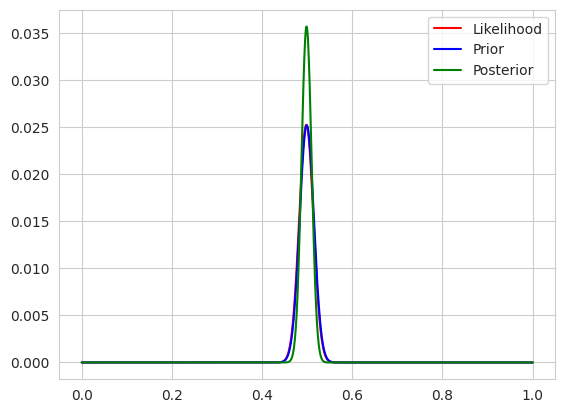

In [146]:
moredata_post = bern_post(n_sample=1000)

### Please answer the questions below to complete the experiment:




In [ ]:
#@title Q.1. In a hospital, research show that of patients suffering from a certain illness, 75% die of it. What is the probability that of 6 randomly selected patients, at least one will recover? { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","0.822", "0.355", "0.2966", "0.004395"]

In [ ]:
#@title Q.2. If X is a continuous random variable with pdf f(x), then what is the relationship between Variance and the Expected value of X? { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","E[X]**2 - E[X**2]", "E[X**2] - E[X]**2", "E[X**2] - XE[X]", "None of the above"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")